In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [131]:
df = pd.read_csv("D:\Projects\AI\SandBox\sample_data_set\combined_data.csv")
df['label'] = df['label'].astype(int)
df['text'] = df['text'].astype(str)
print(df.head(2))
print(df.dtypes)

<>:1: SyntaxWarning: "\P" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\P"? A raw string is also an option.
<>:1: SyntaxWarning: "\P" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\P"? A raw string is also an option.
C:\Users\saisr\AppData\Local\Temp\ipykernel_7088\2075407827.py:1: SyntaxWarning: "\P" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\P"? A raw string is also an option.
  df = pd.read_csv("D:\Projects\AI\SandBox\sample_data_set\combined_data.csv")


   label                                               text
0      1  ounce feather bowl hummingbird opec moment ala...
1      1  wulvob get your medircations online qnb ikud v...
label     int64
text     object
dtype: object


In [132]:
df.iloc[0,1]

'ounce feather bowl hummingbird opec moment alabaster valkyrie dyad bread flack desperate iambic hadron heft quell yoghurt bunkmate divert afterimage'

In [133]:
print(type(df['text'].iloc[0]))

<class 'str'>


In [134]:
df.dtypes

label     int64
text     object
dtype: object

In [135]:
X = df.iloc[:,1]
Y = df[['label']]

In [136]:
X_train , X_test , Y_train , Y_test  = train_test_split(X,Y.values,test_size=0.2,random_state=0)

In [137]:
print(X)

0        ounce feather bowl hummingbird opec moment ala...
1        wulvob get your medircations online qnb ikud v...
2         computer connection from cnn com wednesday es...
3        university degree obtain a prosperous future m...
4        thanks for all your answers guys i know i shou...
                               ...                        
83443    hi given a date how do i get the last date of ...
83444    now you can order software on cd or download i...
83445    dear valued member canadianpharmacy provides a...
83446    subscribe change profile contact us long term ...
83447    get the most out of life ! viagra has helped m...
Name: text, Length: 83448, dtype: object


In [138]:
print(Y)

       label
0          1
1          1
2          0
3          1
4          0
...      ...
83443      0
83444      1
83445      1
83446      0
83447      1

[83448 rows x 1 columns]


# Logistic regression uses iterative optimization
# It gradually improves weights until convergence
# ConvergenceWarning: lbfgs failed to converge (status=1): STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

In [139]:
pipeline = make_pipeline(TfidfVectorizer(
    max_features=5000,        # Keep top 5000 words
    stop_words='english',     # Remove common words
    ngram_range=(1, 2)# Use single words and pairs
    ),LogisticRegression(random_state=42,
        max_iter=1000,
        class_weight='balanced'))


Checking the shapes of the data

In [140]:
# Check the shapes of your data
print(f"X_train shape: {X_train.shape if hasattr(X_train, 'shape') else len(X_train)}")
print(f"Y_train shape: {Y_train.shape if hasattr(Y_train, 'shape') else len(Y_train)}")
print(f"X_test shape: {X_test.shape if hasattr(X_test, 'shape') else len(X_test)}")
print(f"Y_test shape: {Y_test.shape if hasattr(Y_test, 'shape') else len(Y_test)}")

# Check data types
print(f"X_train type: {type(X_train)}")
print(f"Y_train type: {type(Y_train)}")

X_train shape: (66758,)
Y_train shape: (66758, 1)
X_test shape: (16690,)
Y_test shape: (16690, 1)
X_train type: <class 'pandas.core.series.Series'>
Y_train type: <class 'numpy.ndarray'>


In [141]:

pipeline.fit(X_train,Y_train)

D:\Projects\AI\SandBox\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,steps,"[('tfidfvectorizer', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [142]:
prediction = pipeline.predict(X_test)

In [143]:
accuracy = accuracy_score(Y_test, prediction)

In [147]:
print(accuracy)

0.9826842420611145


In [144]:
cm = confusion_matrix(Y_test, prediction)

In [148]:
print(cm)

[[7749  193]
 [  96 8652]]


In [145]:
ps = classification_report(Y_test, prediction)

In [149]:
print(ps)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      7942
           1       0.98      0.99      0.98      8748

    accuracy                           0.98     16690
   macro avg       0.98      0.98      0.98     16690
weighted avg       0.98      0.98      0.98     16690



In [146]:
mr = mean_absolute_error(Y_test, prediction)

In [150]:
print(mr)

0.01731575793888556


Plotting the difference of the test and prediction

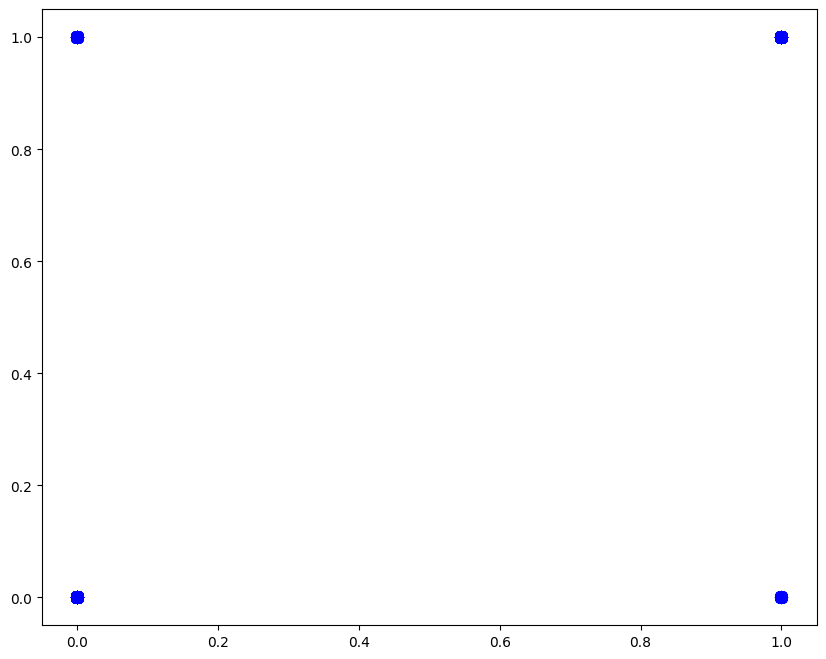

In [153]:
plt.figure(figsize=(10,8))
plt.scatter(Y_test, prediction, color='blue', s=70, label="Predicted vs Actual")
plt.show()